In [19]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Carga de señal (tu archivo .root)
path_signal = "/mnt/ArchivosCompartidos/BeyondSM/DarkMatter/RootFiles/n30k/NanoAODn30k.root"
signal_file = uproot.open(path_signal)
signal_tree = signal_file["Events"]
signal_arrays = signal_tree.arrays(["Jet_pt", "Jet_eta", "MET_pt", "nElectron", "nMuon"], library="ak")

# Carga de fondo (DYJetsToLL)
path_background = "/mnt/ArchivosCompartidos/BeyondSM/DarkMatter/DataAnalysis/Datasets/Background/DYJetsToLL.root"
background_file = uproot.open(path_background)
background_tree = background_file["Events"]
background_arrays = background_tree.arrays(["Jet_pt", "Jet_eta", "MET_pt", "nMuon"], library="ak")

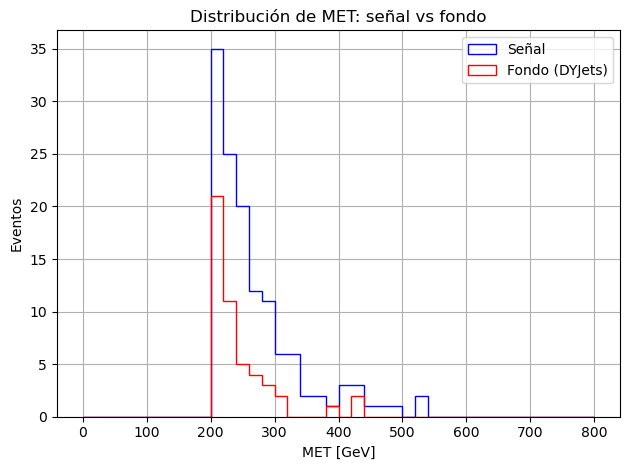

In [27]:


# Función para aplicar cortes
def apply_selection(arrays):
    jets_pt = arrays["Jet_pt"]
    met_pt = arrays["MET_pt"]
    has_jet = ak.any(jets_pt > 100, axis=1)
    has_met = met_pt > 200
    no_muons = arrays["nMuon"] == 0
    selection = has_jet & has_met & no_muons
    return met_pt[selection]

# Aplicar cortes
met_signal = apply_selection(signal_arrays)
met_background = apply_selection(background_arrays)

# Histograma comparativo
plt.hist(ak.to_numpy(met_signal), bins=40, range=(0, 800), histtype='step', label='Señal', color='blue')
plt.hist(ak.to_numpy(met_background), bins=40, range=(0, 800), histtype='step', label='Fondo (DYJets)', color='red')
plt.xlabel("MET [GeV]")
plt.ylabel("Eventos")
plt.title("Distribución de MET: señal vs fondo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("MET_comparacion.png")
plt.show()

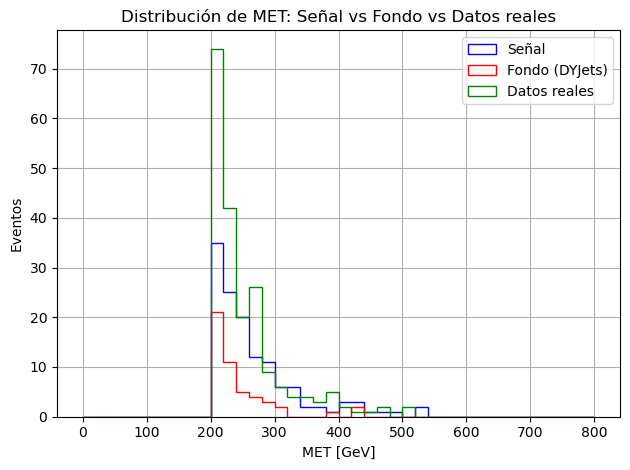

In [ ]:

# Cargar los archivos ROOT (ajusta los nombres si es necesario)

path_data = "/mnt/ArchivosCompartidos/BeyondSM/DarkMatter/DataAnalysis/Datasets/CMS/Run2012B_TauPlusX.root"
data = uproot.open(path_data)["Events"].arrays(["Jet_pt", "MET_pt", "nMuon"], library="ak")

# Función de selección: monojet + MET > 200 GeV + sin muones
def apply_selection(arrays):
    jets = arrays["Jet_pt"]
    met = arrays["MET_pt"]
    has_jet = ak.any(jets > 100, axis=1)
    has_met = met > 200
    no_muons = arrays["nMuon"] == 0
    return met[has_jet & has_met & no_muons]

# Aplicar selección a cada dataset
met_sig = apply_selection(signal_arrays)
met_bg = apply_selection(background_arrays)
met_data = apply_selection(data)

# Crear el histograma
plt.hist(ak.to_numpy(met_sig), bins=40, range=(0, 800), histtype='step', label="Señal", color='blue')
plt.hist(ak.to_numpy(met_bg), bins=40, range=(0, 800), histtype='step', label="Fondo (DYJets)", color='red')
plt.hist(ak.to_numpy(met_data), bins=40, range=(0, 800), histtype='step', label="Datos reales", color='green')
plt.xlabel("MET [GeV]")
plt.ylabel("Eventos")
plt.title("Distribución de MET: Señal vs Fondo vs Datos reales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("met_signal_vs_background_vs_data.png")
plt.show()